In [2]:
import torch

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.optimizers import SGD

In [3]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
load_label_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

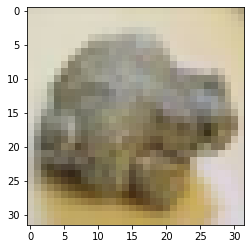

In [8]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])


In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
y_train.shape

(50000, 10)

In [11]:
#normalization
x_train = x_train /255
x_test = x_test /255
x_test.shape

(10000, 32, 32, 3)

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
input_shape = (32,32,3)
batch_size =100
epochs =10


In [14]:
model  = Sequential()

model.add(Conv2D(20,(5,5),activation = 'relu',input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2),strides =  (2, 2)))

model.add(Conv2D(50,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2),strides =  (2, 2)))

model.add(Flatten())

model.add(Dense(500,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(84,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        1520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               625500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [19]:
# model.compile(loss= 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
model.compile(loss = "categorical_crossentropy", optimizer = SGD(lr = 0.01),metrics = ["accuracy"])


In [20]:
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 88s 175ms/step - loss: 2.1712 - accuracy: 0.1868 - val_loss: 1.9685 - val_accuracy: 0.2923
Epoch 2/10
500/500 [==============================] - 82s 163ms/step - loss: 1.9253 - accuracy: 0.3007 - val_loss: 1.8023 - val_accuracy: 0.3551
Epoch 3/10
500/500 [==============================] - 82s 163ms/step - loss: 1.7567 - accuracy: 0.3693 - val_loss: 1.6021 - val_accuracy: 0.4285
Epoch 4/10
500/500 [==============================] - 82s 164ms/step - loss: 1.6165 - accuracy: 0.4154 - val_loss: 1.5104 - val_accuracy: 0.4612
Epoch 5/10
500/500 [==============================] - 82s 164ms/step - loss: 1.5266 - accuracy: 0.4469 - val_loss: 1.5398 - val_accuracy: 0.4596
Epoch 6/10
500/500 [==============================] - 81s 162ms/step - loss: 1.4649 - accuracy: 0.4713 - val_loss: 1.4050 - val_accuracy: 0.4952
Epoch 7/10
500/500 [==============================] - 81s 162ms/step - loss: 1.4156 - accuracy: 0.4933 - val_loss: 1.3852 - val_ac

In [108]:
#  61 % Accuracy on the test set which used as the validation data with LeNet without data Augmentation.Using Adam optimiser.
# 55.24% using SGD.

In [109]:
#Nows lets compare this accuracy, with the accuracy after Data augmentation ,by flipping the images.

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [22]:
data_aug = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)
data_aug.fit(x_train)

In [23]:
model.fit_generator(data_aug.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=391,
                        epochs=epochs,validation_data=(x_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
391/391 [==============================] - 59s 151ms/step - loss: 1.4656 - accuracy: 0.4699 - val_loss: 1.2720 - val_accuracy: 0.5483
Epoch 2/10
391/391 [==============================] - 82s 210ms/step - loss: 1.4273 - accuracy: 0.4850 - val_loss: 1.2656 - val_accuracy: 0.5498
Epoch 3/10
391/391 [==============================] - 82s 209ms/step - loss: 1.4166 - accuracy: 0.4944 - val_loss: 1.2931 - val_accuracy: 0.5395
Epoch 4/10
391/391 [==============================] - 84s 215ms/step - loss: 1.3943 - accuracy: 0.5004 - val_loss: 1.2274 - val_accuracy: 0.5668
Epoch 5/10
391/391 [==============================] - 84s 215ms/step - loss: 1.3727 - accuracy: 0.5099 - val_loss: 1.2570 - val_accuracy: 0.5548
Epoch 6/10
391/391 [==============================] - 83s 212ms/step - loss: 1.3620 - accuracy: 0.5141 - val_loss: 1.2101 - val_accuracy: 0.5696
Epoch 7/10
391/391 [==============================] - 

In [ ]:
# 58.77 with data augmentation. This has increased the accuracy by about 3%.
# This can be improved . Check the code below.

In [24]:
data_aug2 = ImageDataGenerator(featurewise_center=False,  samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


data_aug2.fit(x_train)

In [25]:
model.fit_generator(data_aug2.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=391,
                        epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 86s 219ms/step - loss: 1.2695 - accuracy: 0.5476 - val_loss: 1.1664 - val_accuracy: 0.5831
Epoch 2/10
391/391 [==============================] - 86s 220ms/step - loss: 1.2535 - accuracy: 0.5558 - val_loss: 1.1336 - val_accuracy: 0.5957
Epoch 3/10
391/391 [==============================] - 86s 220ms/step - loss: 1.2374 - accuracy: 0.5614 - val_loss: 1.1383 - val_accuracy: 0.5980
Epoch 4/10
391/391 [==============================] - 86s 220ms/step - loss: 1.2235 - accuracy: 0.5666 - val_loss: 1.0956 - val_accuracy: 0.6114
Epoch 5/10
391/391 [==============================] - 86s 219ms/step - loss: 1.2143 - accuracy: 0.5702 - val_loss: 1.0886 - val_accuracy: 0.6171
Epoch 6/10
391/391 [==============================] - 85s 218ms/step - loss: 1.2013 - accuracy: 0.5739 - val_loss: 1.0973 - val_accuracy: 0.6121
Epoch 7/10
391/391 [==============================] - 86s 220ms/step - loss: 1.1938 - accuracy: 0.5768 - val_loss: 1.1953 - val_ac

In [ ]:
#Accuracy has increased to 62.45% after data augmentation.